
[MoviePy] Building file sinc_mpl.gif with imageio


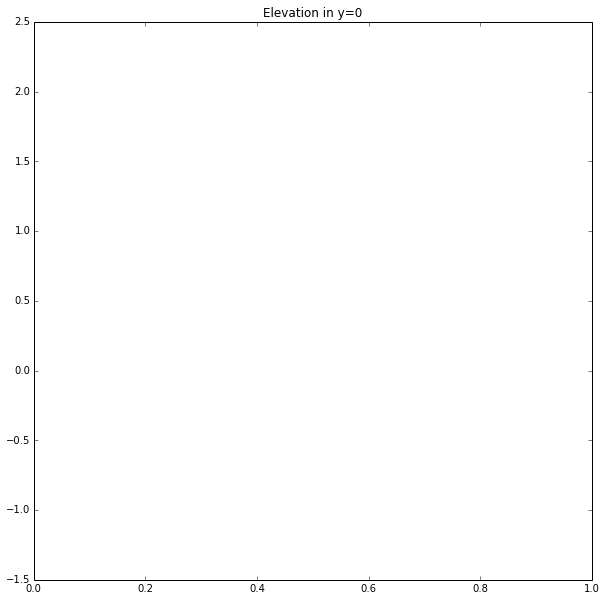

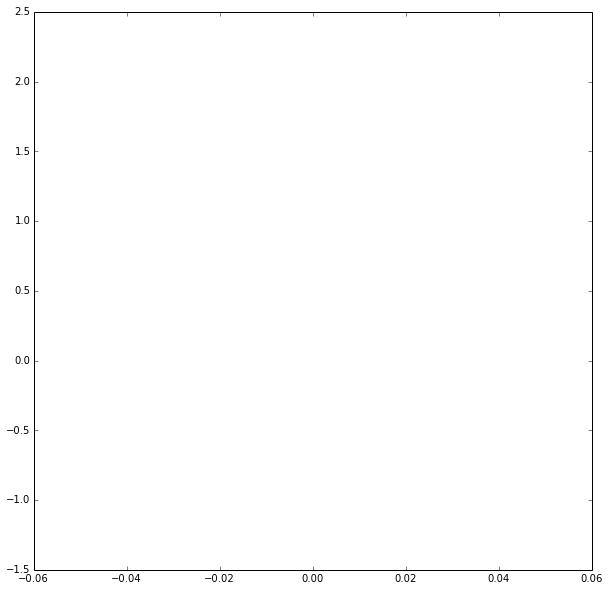

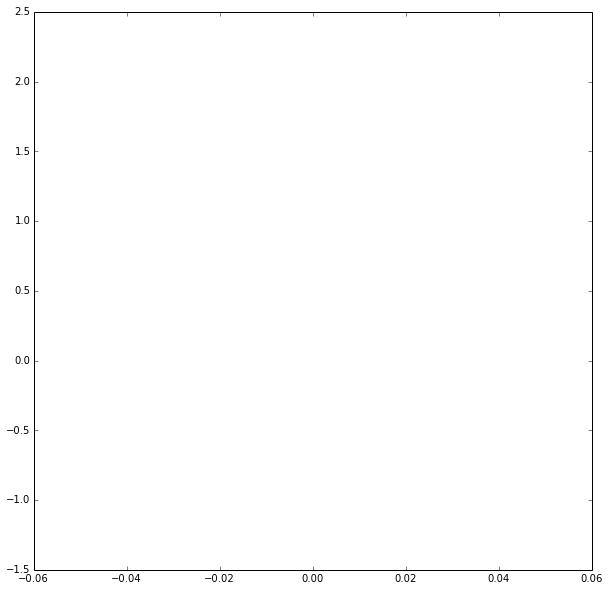

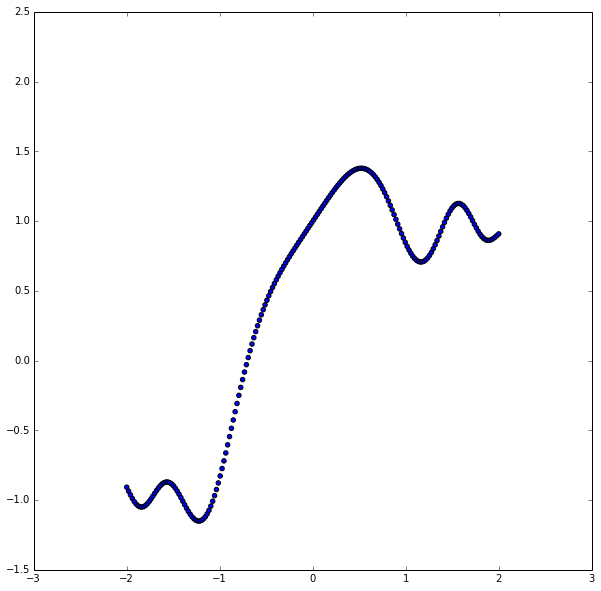

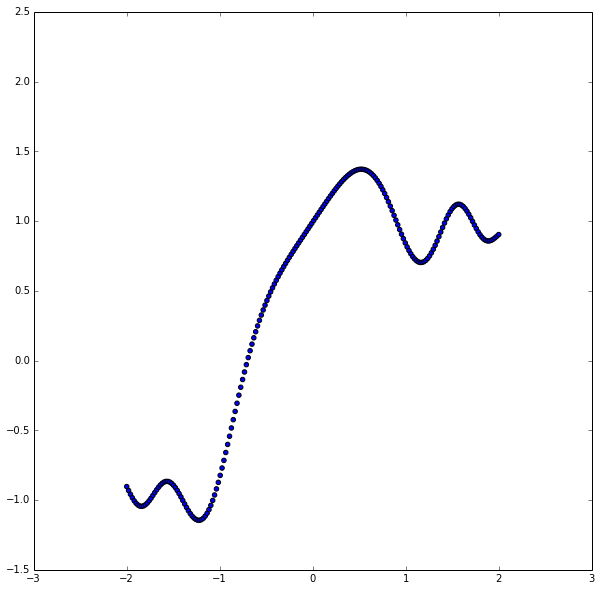

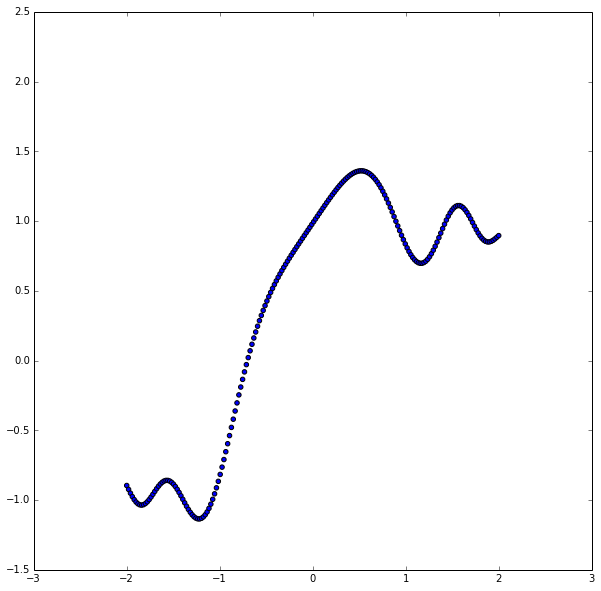

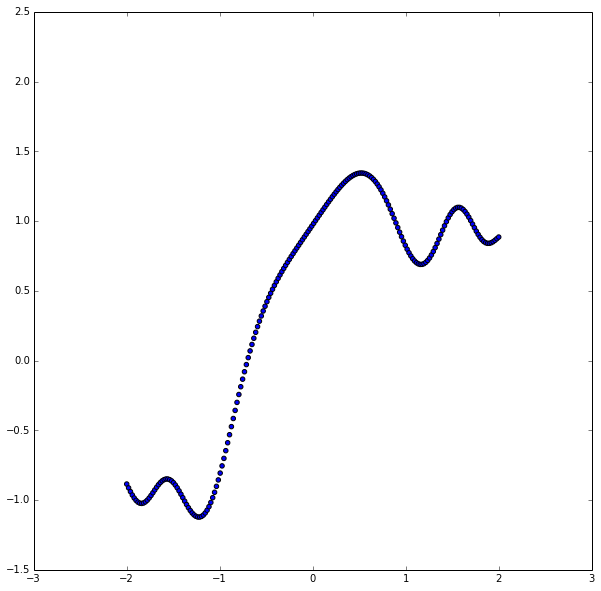

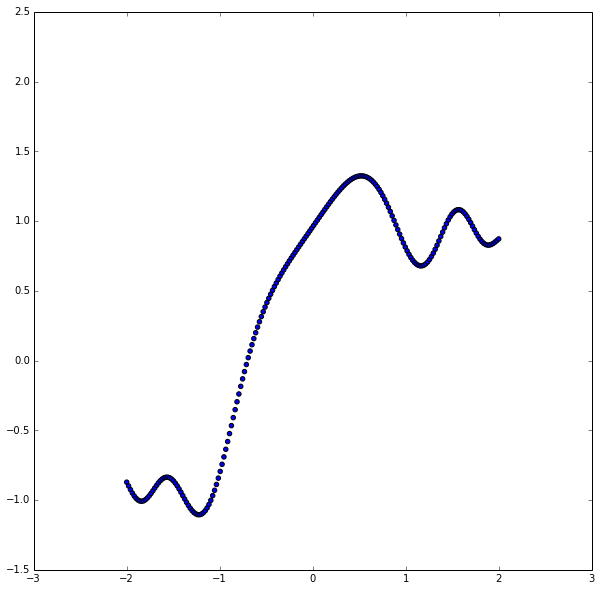

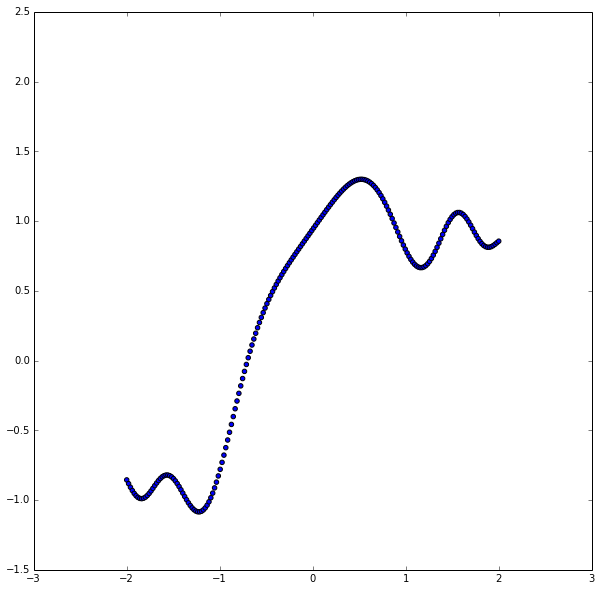

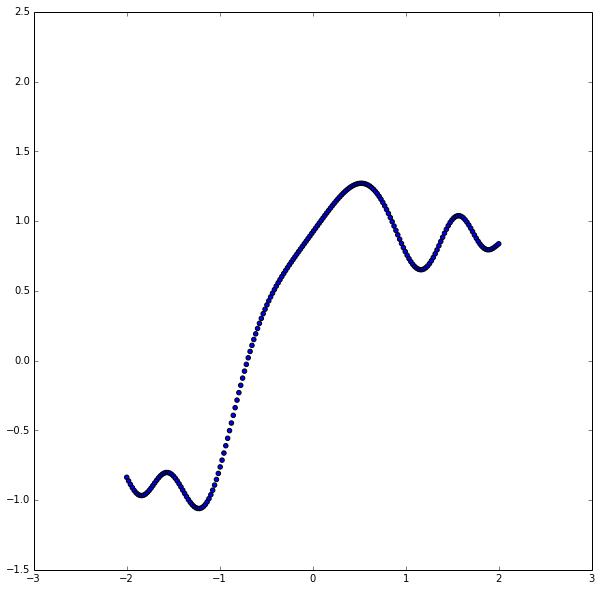

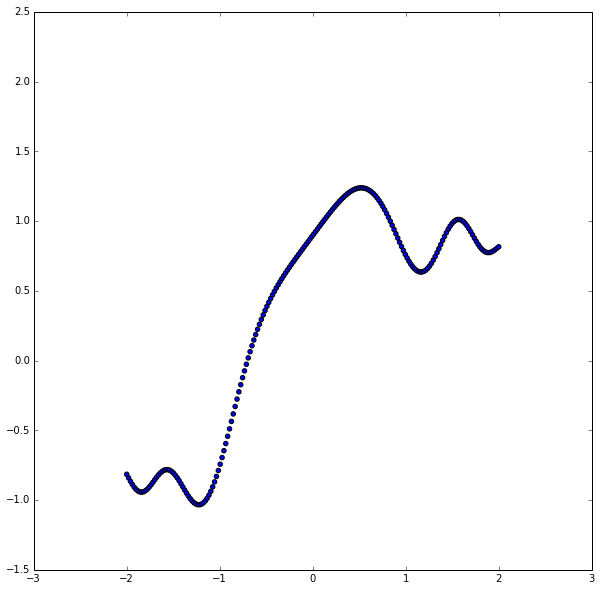

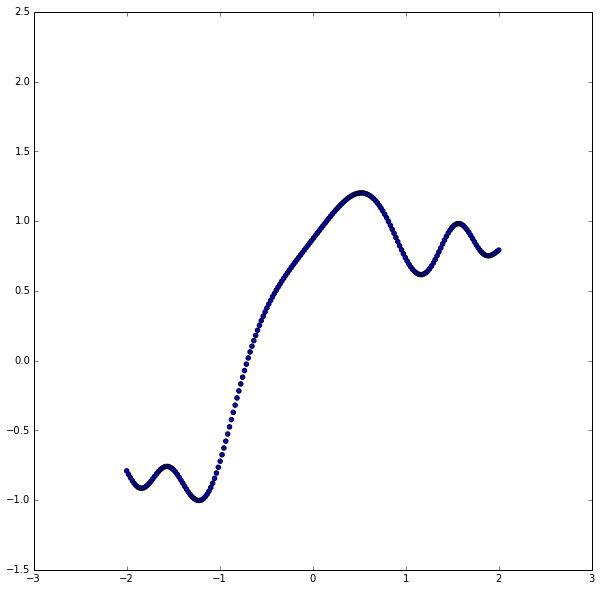

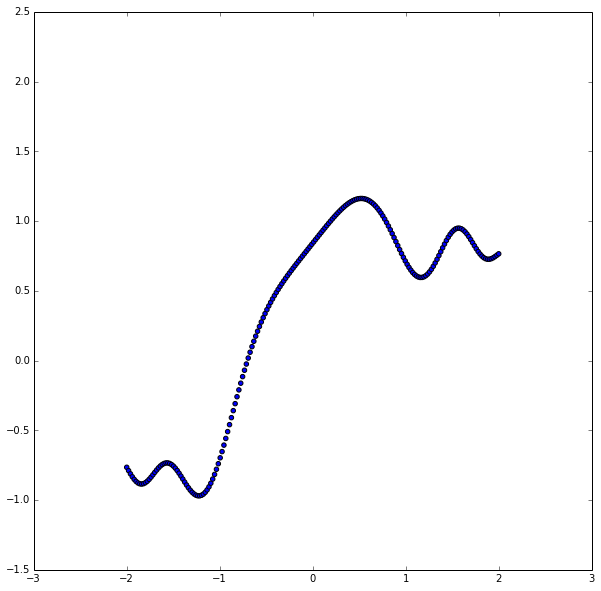

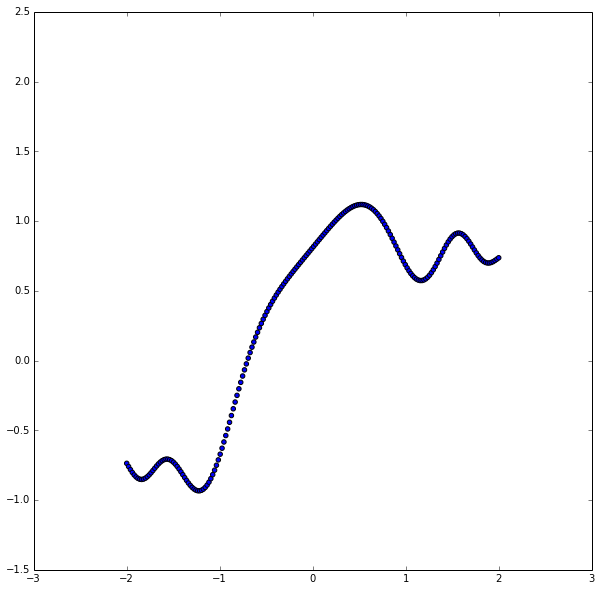

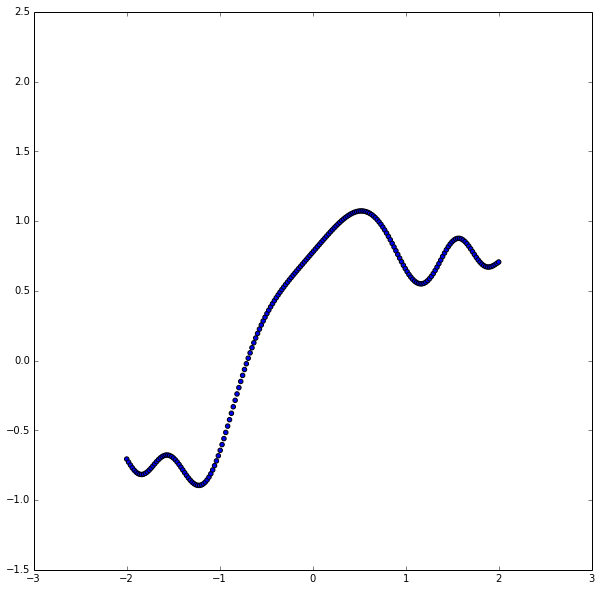

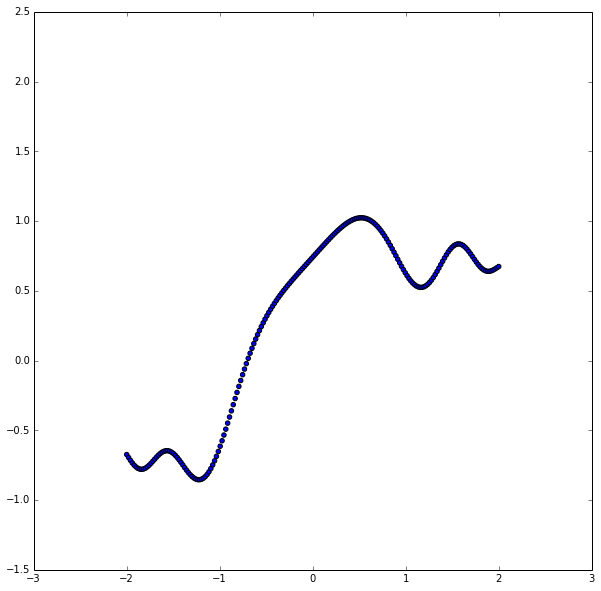

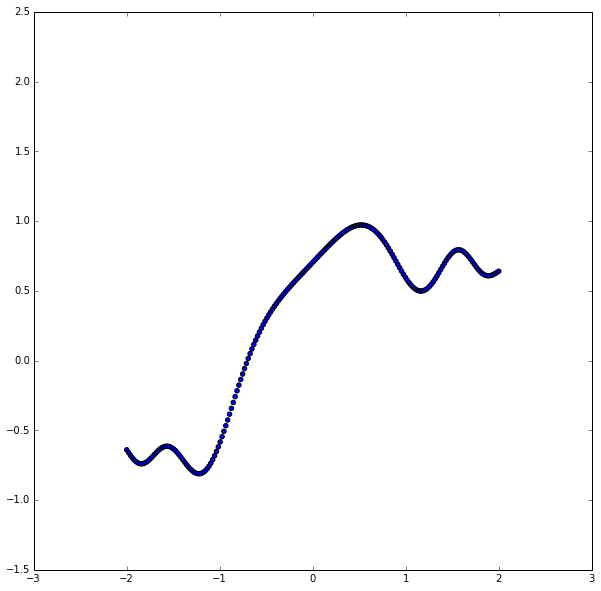

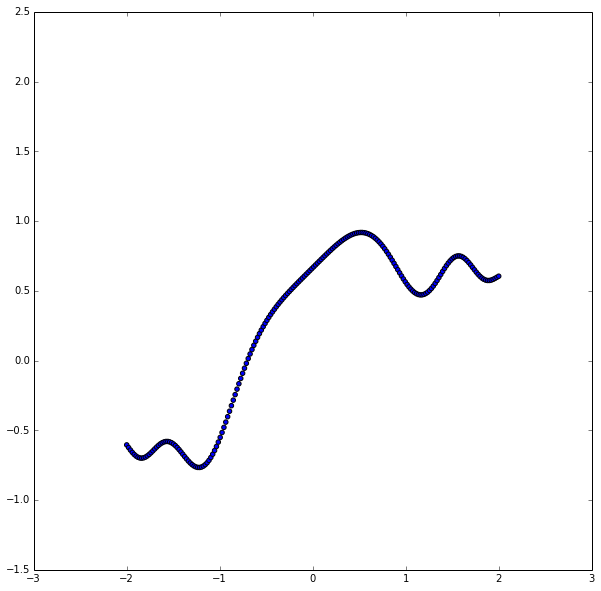

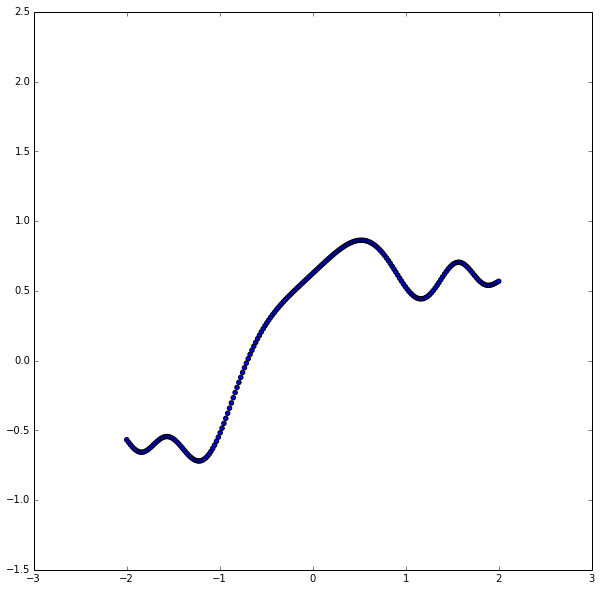

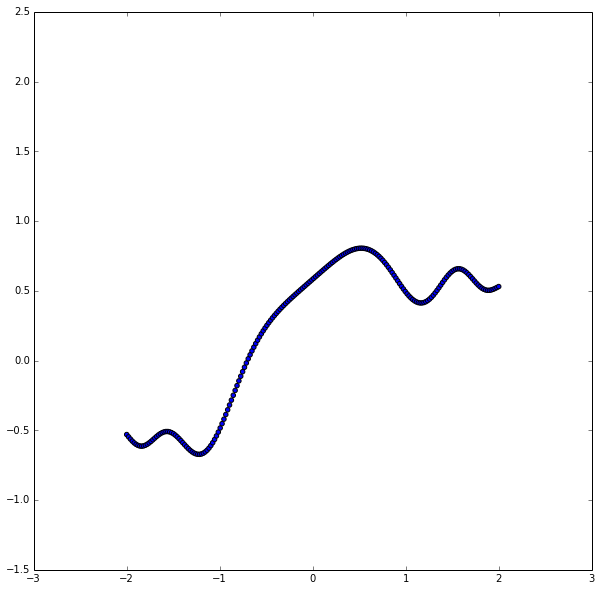

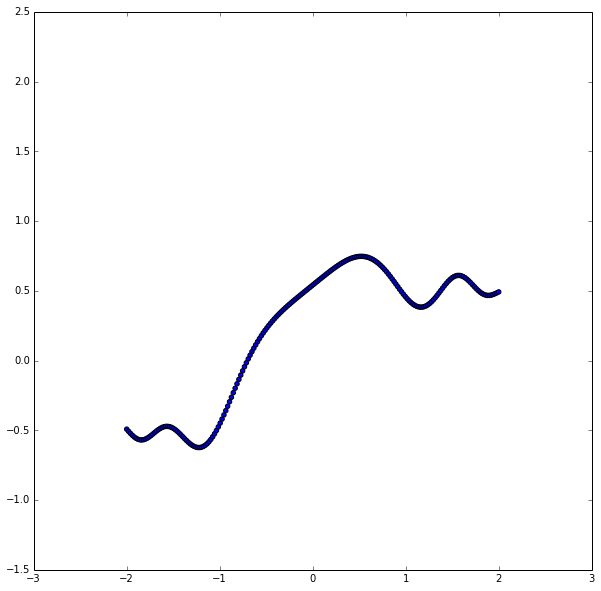

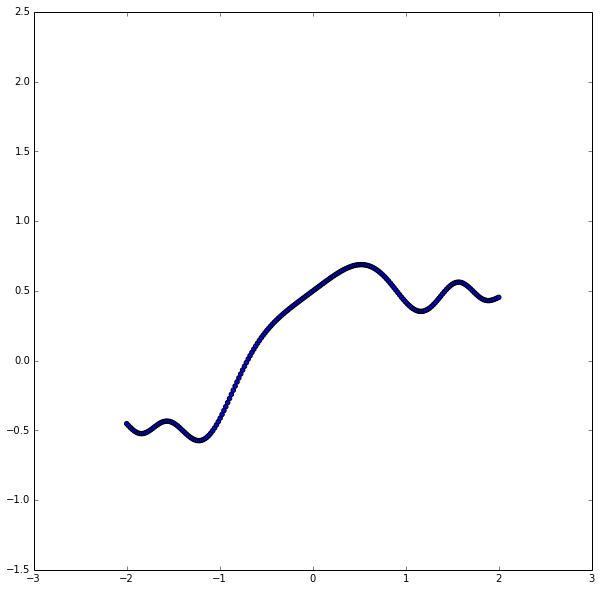

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

# DRAW A FIGURE WITH MATPLOTLIB

duration = 2

fig, ax = plt.subplots(figsize=(10,10), facecolor='white')
xx = np.linspace(-2,2,200) # the x vector
zz = lambda d: np.sinc(xx**2)+np.sin(xx+d) # the (changing) z vector
ax.set_title("Elevation in y=0")
ax.set_ylim(-1.5,2.5)
#line = ax.scatter(xx, zz(0), c='red',s=280,alpha=0.5,cmap=plt.cm.bone)

# ANIMATE WITH MOVIEPY (UPDATE THE CURVE FOR EACH t). MAKE A GIF.

def make_frame(t):
    fig, ax = plt.subplots(figsize=(10,10), facecolor='white')
    ax.set_ylim(-1.5,2.5)
    ax.scatter( xx, zz(0)*np.sin(t)/t )  # <= Update the curve
    return mplfig_to_npimage(fig) # RGB image of the figure

animation = VideoClip(make_frame, duration=duration)
animation.write_gif("sinc_mpl.gif", fps=10)


[MoviePy] Building file svm.gif with imageio


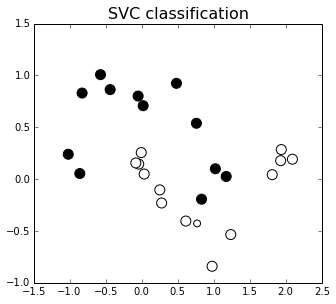

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm # sklearn = scikit-learn
from sklearn.datasets import make_moons
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

X, Y = make_moons(50, noise=0.1, random_state=2) # semi-random data

fig, ax = plt.subplots(1, figsize=(4, 4), facecolor=(1,1,1))
fig.subplots_adjust(left=0, right=1, bottom=0)
xx, yy = np.meshgrid(np.linspace(-2,3,500), np.linspace(-1,2,500))

def make_frame(t):
    ax.clear()
    #ax.axis('off')
    ax.set_title("SVC classification", fontsize=16)

    classifier = svm.SVC(gamma=2, C=1)
    # the varying weights make the points appear one after the other
    weights = np.minimum(1, np.maximum(0, t**2+10-np.arange(50)))
    classifier.fit(X, Y, sample_weight=weights)
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #ax.contourf(xx, yy, Z, cmap=plt.cm.bone, alpha=0.8,
    #            vmin=-2.5, vmax=2.5, levels=np.linspace(-2,2,20))
    ax.scatter(X[:,0], X[:,1], c=Y, s=100*weights, cmap=plt.cm.bone)

    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration = 4)
animation.write_gif("svm.gif", fps=15)

In [16]:
type(X)
type(Y)



numpy.ndarray